#### 常用工具包  
from TM1py.Services import TM1Service  
from TM1py.Objects import Cube  
from TM1py.Objects import Dimension, Element, ElementAttribute, Hierarchy  
from TM1py.Utils import Utils
edges = Utils.CaseAndSpaceInsensitiveTuplesDict()->元组字典->{'Asia':'China','Asia':'Japan'...}->包含父子级关系信息
#### 函数  
Element('元素'，'类型')->创建单个元素->列表推导式->elememts->创建多个元素  
Hierarchy(name=DIMENSION_NAME, dimension_name=DIMENSION_NAME, elements=elements，edges=edges)->创建层级结构  
element_attributes = ElementAttribute(name='attr_name', attribute_type='Alias/String')->创建一个属性(多个属性用列表传数)   
dimension = Dimension(name=DIMENSION_NAME, hierarchies=[hierarchy])->创建维度  
tm1.dimensions.create(dimension)->更新维度到服务器

#### 关于维度实例与Hier实例  
Dimension实例在维度中只是一个'外壳'，真正的内容是里面的hier实例，如下图  
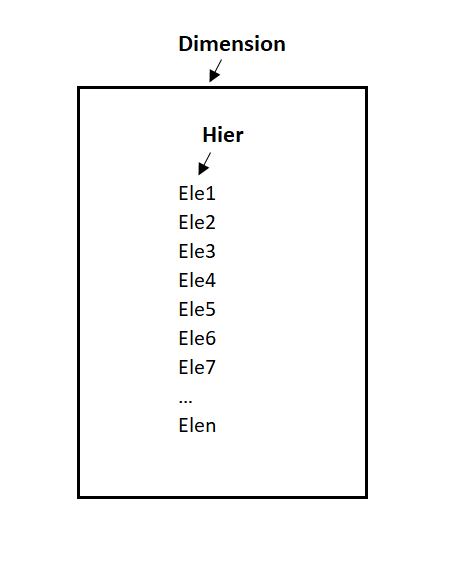

In [1]:
import pandas as pd

Region=pd.read_csv(r'C:\Users\User\Desktop\Region_Tm1.csv')
Region

,Level00,Level01,Level02,别名
0,China,Asia,World,中国
1,Japan,Asia,World,日本
2,Korean,Asia,World,韩国
3,China,UN,World,中国
4,UK,Euro,World,英国
5,German,Euro,World,德国
6,France,Euro,World,法国
7,UK,UN,World,英国


In [37]:
Region.loc[7,'Level02']='World'

In [2]:
Region

,Level00,Level01,Level02,别名
0,China,Asia,World,中国
1,Japan,Asia,World,日本
2,Korean,Asia,World,韩国
3,China,UN,World,中国
4,UK,Euro,World,英国
5,German,Euro,World,德国
6,France,Euro,World,法国
7,UK,UN,World,英国


In [4]:
level00=Region['Level00']
level01=Region['Level01']
level02=Region['Level02']

In [5]:
from TM1py.Services import TM1Service
#from TM1py.Objects import Cube
from TM1py.Objects import Dimension, Element, ElementAttribute, Hierarchy
from TM1py.Utils import Utils
DIMENSION_NAME = "Region_Tm1"

with TM1Service(address="localhost", port=30011, ssl=True, user="admin", password="apple") as tm1:
    #创建元素部分
    lv0 = [Element(e0, 'Numeric') for e0 in level00]
    lv1 = [Element(e1, 'Numeric') for e1 in level01.unique()]
    lv2 = [Element(e2, 'Numeric') for e2 in level02.unique()]
    elements=lv0+lv1+lv2
    #创建层级部分
    edges = Utils.CaseAndSpaceInsensitiveTuplesDict()
    for i in range(Region.shape[0]):
        parent_child = (level01[i],level00[i])
        edges[parent_child] = 1
        parent_child = (level02[i],level01[i])
        edges[parent_child] = 1
    
    #创建属性
     #element_attributes = [ElementAttribute(name='Name Long', attribute_type='Alias')]
    hierarchy = Hierarchy(name=DIMENSION_NAME, dimension_name=DIMENSION_NAME, elements=elements,edges=edges)
    dimension = Dimension(name=DIMENSION_NAME, hierarchies=[hierarchy])

    # Send everything to TM1
    tm1.dimensions.create(dimension)

In [29]:
('A','B')

('A', 'B')

In [210]:
import pandas as pd
from sqlalchemy import create_engine

# 初始化数据库连接
# 按实际情况依次填写MySQL的用户名、密码、IP地址、端口、数据库名

engine = create_engine("mysql+pymysql://{}:{}@{}:{}/{}".format('admin', '1234', 
                                                               '192.168.1.104', '3306', 'process'))

# MySQL导入DataFrame
# 填写自己所需的SQL语句，可以是复杂的查询语句
#zl_stg_amazon_payments_2018_to_2021_quan
sql_query = 'select * from 成本中心_copy2 ;'
# 使用pandas的read_sql_query函数执行SQL语句，并存入DataFrame
COA = pd.read_sql_query(sql_query, engine)

COA.head()


,coa段值集,架构,子值,是否汇总,外围系统是否显示,创建日期,最后更新日期,启用标识,时间从,时间至,...,genid06,geniddesc06,genid07,geniddesc07,genid08,geniddesc08,genid09,geniddesc09,genid10,geniddesc10
0,ANT_DEPARTMENT,T4,34999H779833,N,,2022-01-18 19:11:05,2022-01-18 19:11:05,Y,,,...,None,,None,,None,,None,,,
1,ANT_DEPARTMENT,T4,MBU00004A,Y,,2022-01-18 19:11:04,2022-01-18 19:11:04,Y,,,...,None,,None,,None,,None,,,
2,ANT_DEPARTMENT,T4,31694T4,Y,,2021-02-25 21:35:06,2022-01-18 19:11:47,Y,,,...,None,,None,,None,,None,,,
3,ANT_DEPARTMENT,T4,344505101332,N,,2021-02-25 21:34:08,2021-02-25 21:34:08,Y,,,...,None,,None,,None,,None,,,
4,ANT_DEPARTMENT,T4,349992111511,N,,2021-02-25 21:34:40,2021-02-25 21:34:40,Y,,,...,None,,None,,None,,None,,,


In [211]:
COA_clean=COA[['子值','genid01','genid02','genid03','genid04','genid05','genid06','genid07','genid08','genid09']]

In [206]:
COA_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35663 entries, 0 to 35662
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   子值       35663 non-null  object
 1   genid01  35663 non-null  object
 2   genid02  35641 non-null  object
 3   genid03  22597 non-null  object
 4   genid04  19073 non-null  object
 5   genid05  17126 non-null  object
 6   genid06  7526 non-null   object
 7   genid07  1297 non-null   object
 8   genid08  122 non-null    object
 9   genid09  18 non-null     object
dtypes: object(10)
memory usage: 2.7+ MB


In [158]:
#for i in COA_clean.columns:

In [212]:
level01=COA_clean['genid01'].dropna()
level02=COA_clean['genid02'].dropna()
level03=COA_clean['genid03'].dropna()
level04=COA_clean['genid04'].dropna()
level05=COA_clean['genid05'].dropna()
level06=COA_clean['genid06'].dropna()
level07=COA_clean['genid07'].dropna()
level08=COA_clean['genid08'].dropna()
level09=COA_clean['genid09'].dropna()

In [213]:
from TM1py.Services import TM1Service
from TM1py.Objects import Cube
from TM1py.Objects import Dimension, Element, ElementAttribute, Hierarchy
from TM1py.Utils import Utils
DIMENSION_NAME = "COA_Ant_Tm1py"

with TM1Service(address="localhost", port=30011, ssl=True, user="admin", password="apple") as tm1:
    #创建元素部分
    lv1 = [Element(e1, 'Numeric') for e1 in level01.unique()]
    lv2 = [Element(e2, 'Numeric') for e2 in level02.unique()]
    lv3 = [Element(e2, 'Numeric') for e2 in level03.unique()]
    lv4 = [Element(e2, 'Numeric') for e2 in level04.unique()]
    lv5 = [Element(e2, 'Numeric') for e2 in level05.unique()]
    lv6 = [Element(e2, 'Numeric') for e2 in level06.unique()]
    lv7 = [Element(e2, 'Numeric') for e2 in level07.unique()]
    lv8 = [Element(e2, 'Numeric') for e2 in level08.unique()]
    lv9 = [Element(e2, 'Numeric') for e2 in level09.unique()]
    elements=lv1+lv2+lv3+lv4+lv5+lv6+lv7+lv8+lv9
    #创建层级部分
    edges = Utils.CaseAndSpaceInsensitiveTuplesDict()
    for i in range(COA_clean.shape[0]):
        if (COA_clean['genid09'].isnull()[i]==False) & (COA_clean['genid08'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid08'][i],COA_clean['genid09'][i])
            edges[parent_child] = 1
        if (COA_clean['genid08'].isnull()[i]==False) & (COA_clean['genid07'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid07'][i],COA_clean['genid08'][i])
            edges[parent_child] = 1
    
        if (COA_clean['genid07'].isnull()[i]==False) & (COA_clean['genid06'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid06'][i],COA_clean['genid07'][i])
            edges[parent_child] = 1
        if (COA_clean['genid06'].isnull()[i]==False) & (COA_clean['genid05'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid05'][i],COA_clean['genid06'][i])
            edges[parent_child] = 1
        if (COA_clean['genid05'].isnull()[i]==False) & (COA_clean['genid04'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid04'][i],COA_clean['genid05'][i])
            edges[parent_child] = 1
    
        if (COA_clean['genid04'].isnull()[i]==False) & (COA_clean['genid03'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid03'][i],COA_clean['genid04'][i])
            edges[parent_child] = 1
        if (COA_clean['genid03'].isnull()[i]==False) & (COA_clean['genid02'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid02'][i],COA_clean['genid03'][i])
            edges[parent_child] = 1     
        if (COA_clean['genid02'].isnull()[i]==False) & (COA_clean['genid01'].isnull()[i]==False):
        
            parent_child = (COA_clean['genid01'][i],COA_clean['genid02'][i])
            edges[parent_child] = 1
    
    
    
    hierarchy = Hierarchy(name=DIMENSION_NAME, dimension_name=DIMENSION_NAME, elements=elements,edges=edges)
    dimension = Dimension(name=DIMENSION_NAME, hierarchies=[hierarchy])

    # Send everything to TM1
    tm1.dimensions.create(dimension)

In [ ]:
level09

In [103]:
import numpy as np
COA_clean['genid09'].isnull()[0]==False

False

In [183]:
COA_clean['genid09']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
35658    NaN
35659    NaN
35660    NaN
35661    NaN
35662    NaN
Name: genid09, Length: 35663, dtype: object

In [114]:
  if (COA_clean['genid05'].isnull()[29999]==False) & (COA_clean['genid04'].isnull()[29999]==False):
        print(1)

1


In [190]:
edges

{('H7798T4', '34999H779833'): 1, ('DigiTech', 'H7798T4'): 1, ('H7798T4', 'MBU00004A'): 1, ('MBU00004A', '31694T4'): 1, ('31694T4', '344505101332'): 1, ('31694T4', '349992111511'): 1, ('31694T4', '349992111533'): 1, ('31694T4', '349992961733'): 1, ('31694T4', '349993144511'): 1, ('31694T4', '349993144533'): 1, ('31694T4', '349993169433'): 1, ('31694T4', '349993583733'): 1, ('31694T4', '349994150633'): 1, ('Audit_Adj', '34999AUDIT61'): 1, ('Audit_Adj', '34999AUDIT62'): 1, ('Audit_Adj', '34999AUDIT63'): 1, ('Audit_Adj', '34999AUDIT64'): 1, ('Cust_Fund', 'ZF0306'): 1, ('ZF0306', 'MBU00009M'): 1, ('H7798T4', '349997520101'): 1, ('H7798T4', '349997520133'): 1, ('48414T4', '34999C519133'): 1, ('MBU00004A', '48414T4'): 1, ('48414T4', '34999C519233'): 1, ('48414T4', '34999C519333'): 1, ('48414T4', '34999C529333'): 1, ('48414T4', '34999C793433'): 1, ('48414T4', '34999F520233'): 1, ('48414T4', '34999F520333'): 1, ('48414T4', '34999F520433'): 1, ('48414T4', '34999F678133'): 1, ('48414T4', '34999G0

In [132]:
COA_clean['genid09'].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
35658    True
35659    True
35660    True
35661    True
35662    True
Name: genid09, Length: 35663, dtype: bool

In [130]:
COA_clean['genid09'].astype('str')[1]

'nan'

In [203]:
elements

[Element:{"Name": "DigiTech", "Type": "Numeric"},
 Element:{"Name": "000000000000", "Type": "Numeric"},
 Element:{"Name": "Audit_Adj", "Type": "Numeric"},
 Element:{"Name": "Cust_Fund", "Type": "Numeric"},
 Element:{"Name": "DigitalFin", "Type": "Numeric"},
 Element:{"Name": "Intbusiness", "Type": "Numeric"},
 Element:{"Name": "Escrointer", "Type": "Numeric"},
 Element:{"Name": "GBABank", "Type": "Numeric"},
 Element:{"Name": "Insurance", "Type": "Numeric"},
 Element:{"Name": "Mid_Platform", "Type": "Numeric"},
 Element:{"Name": "Microloan", "Type": "Numeric"},
 Element:{"Name": "Others", "Type": "Numeric"},
 Element:{"Name": "PRCpayment", "Type": "Numeric"},
 Element:{"Name": "PRC_GAAP_ADJ", "Type": "Numeric"},
 Element:{"Name": "Sharing", "Type": "Numeric"},
 Element:{"Name": "Profitshare", "Type": "Numeric"},
 Element:{"Name": "Sesame", "Type": "Numeric"},
 Element:{"Name": "SmartTec", "Type": "Numeric"},
 Element:{"Name": "XLine", "Type": "Numeric"},
 Element:{"Name": "TIP", "Type"